In [70]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from datetime import datetime


In [71]:
ticket_monster_df = pd.read_csv('tm_all_scenarios.csv')
pet_clinic_df = pd.read_csv('pc_all_scenarios_2.csv')

In [72]:

# Define the datetime format
fmt = "%d-%m-%yT%H-%M-%S"

# Define the two timestamps
t1 = "11-12-23T03-19-36"
t2 = "09-12-23T06-28-39"

# Convert the timestamps to datetime objects
dt1 = datetime.strptime(t1, fmt)
dt2 = datetime.strptime(t2, fmt)

# Calculate the difference in hours
diff = dt1 - dt2
hours_diff = diff.total_seconds() / 3600

print("Difference in hours: ", hours_diff)

Difference in hours:  44.84916666666667


In [73]:

# Define a function to perform t-test for each scenario
def perform_ttest(df):
    # Get unique scenarios
    scenarios = df['ScenarioPath'].unique()

    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Scenario', 't_statistic', 'p_value'])

    # Loop over each scenario
    for scenario in scenarios:
        # Filter data for current scenario
        scenario_data = df[df['ScenarioPath'] == scenario]

        # Split the data into two DataFrames, one for 'micro' and one for 'mono'
        micro_data = scenario_data[scenario_data['Architecture'] == 'micro']
        mono_data = scenario_data[scenario_data['Architecture'] == 'mono']

        # Perform t-test
        t_statistic, p_value = ttest_ind(micro_data['Joules'], mono_data['Joules'])

        # Append the results to the DataFrame
        result = pd.DataFrame({'Scenario': [scenario], 't_statistic': [t_statistic], 'p_value': [p_value]})
        results = pd.concat([results, result], ignore_index=True)

    return results

# Perform t-test for each scenario in ticket_monster_df and pet_clinic_df
ticket_monster_results = perform_ttest(ticket_monster_df)
pet_clinic_results = perform_ttest(pet_clinic_df)

# Print the results
print("Ticket Monster t-test Results:")
print(ticket_monster_results)
print("\nPet Clinic t-test Results:")
print(pet_clinic_results)

Ticket Monster t-test Results:
  Scenario  t_statistic       p_value
0        1    -0.093993  9.254389e-01
1        2    -6.019273  1.266751e-07
2        3    -7.056458  2.356193e-09

Pet Clinic t-test Results:
  Scenario  t_statistic       p_value
0        1    -0.209252  8.349851e-01
1        2    -3.714823  4.590234e-04
2        3    -6.461945  2.333477e-08


/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1776729204.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)
/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1776729204.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [74]:
import pandas as pd
from scipy.stats import ttest_ind

# Define a function to perform Welch's t-test for each scenario
def perform_welchs_ttest(df):
    # Get unique scenarios
    scenarios = df['ScenarioPath'].unique()

    # Initialize an empty DataFrame to store the results
    results = pd.DataFrame(columns=['Scenario', 't_statistic', 'p_value'])

    # Loop over each scenario
    for scenario in scenarios:
        # Filter data for current scenario
        scenario_data = df[df['ScenarioPath'] == scenario]

        # Split the data into two DataFrames, one for 'micro' and one for 'mono'
        micro_data = scenario_data[scenario_data['Architecture'] == 'micro']
        mono_data = scenario_data[scenario_data['Architecture'] == 'mono']

        # Perform Welch's t-test
        t_statistic, p_value = ttest_ind(micro_data['Joules'], mono_data['Joules'], equal_var=False)

        # Create a DataFrame for the result
        result = pd.DataFrame({'Scenario': [scenario], 't_statistic': [t_statistic], 'p_value': [p_value]})

        # Concatenate the result to the results DataFrame
        results = pd.concat([results, result], ignore_index=True)

    return results

# Perform Welch's t-test for each scenario in ticket_monster_df and pet_clinic_df
ticket_monster_results = perform_welchs_ttest(ticket_monster_df)
pet_clinic_results = perform_welchs_ttest(pet_clinic_df)

# Print the results
print("Ticket Monster Welch's t-test Results:")
print(ticket_monster_results)
print("\nPet Clinic Welch's t-test Results:")
print(pet_clinic_results)

Ticket Monster Welch's t-test Results:
  Scenario  t_statistic       p_value
0        1    -0.093993  9.254389e-01
1        2    -6.019273  1.304479e-07
2        3    -7.056458  2.483329e-09

Pet Clinic Welch's t-test Results:
  Scenario  t_statistic       p_value
0        1    -0.209252  8.349851e-01
1        2    -3.714823  4.593827e-04
2        3    -6.461945  2.333477e-08


/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/3516944271.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)
/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/3516944271.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [75]:
from scipy.stats import ttest_ind

# Split the data into two DataFrames, one for 'micro' and one for 'mono'
micro_data_pc = pet_clinic_df[pet_clinic_df['Architecture'] == 'micro']
mono_data_pc = pet_clinic_df[pet_clinic_df['Architecture'] == 'mono']

# Perform t-test
t_statistic, p_value = ttest_ind(micro_data_pc['Joules'], mono_data_pc['Joules'])

print("t statistic: ", t_statistic)
print("p-value: ", p_value)

t statistic:  -1.3180475268184224
p-value:  0.18918141708289368


In [76]:
# Note: Original F-test for Ticket Monster

# This cell previously contained F-test calculations with undefined variance variables. Those calculations have been moved to cells below where we first calculate the variances and then perform the F-tests for both datasets.

# In the updated workflow, we:
# 1. Calculate variances for both architectures
# 2. Perform F-tests to compare these variances
# 3. Based on F-test results, choose the appropriate t-test (though we use Welch's t-test regardless for robustness)

# Also added: per-scenario variance analysis to provide a more detailed comparison between architectures.

In [77]:
# Calculate variances for Ticket Monster data
micro_data_tm = ticket_monster_df[ticket_monster_df['Architecture'] == 'micro']['Joules']
mono_data_tm = ticket_monster_df[ticket_monster_df['Architecture'] == 'mono']['Joules']
variance_micro_tm = micro_data_tm.var()
variance_mono_tm = mono_data_tm.var()

# Calculate variances for PetClinic data
micro_data_pc = pet_clinic_df[pet_clinic_df['Architecture'] == 'micro']['Joules']
mono_data_pc = pet_clinic_df[pet_clinic_df['Architecture'] == 'mono']['Joules']
variance_micro_pc = micro_data_pc.var()
variance_mono_pc = mono_data_pc.var()

print("Ticket Monster Variances:")
print(f"Microservice variance: {variance_micro_tm:.4f}")
print(f"Monolithic variance: {variance_mono_tm:.4f}")

print("\nPetClinic Variances:")
print(f"Microservice variance: {variance_micro_pc:.4f}")
print(f"Monolithic variance: {variance_mono_pc:.4f}")

Ticket Monster Variances:
Microservice variance: 4815.7242
Monolithic variance: 6046.7694

PetClinic Variances:
Microservice variance: 2011.8794
Monolithic variance: 2790.6350


In [78]:
# Now perform F-tests using the calculated variances
from scipy.stats import f

# Calculate F test statistic for Ticket Monster
f_statistic = variance_micro_tm / variance_mono_tm

# Calculate degrees of freedom for Ticket Monster
df1 = len(ticket_monster_df[ticket_monster_df['Architecture'] == 'micro']) - 1
df2 = len(ticket_monster_df[ticket_monster_df['Architecture'] == 'mono']) - 1

# Calculate p-value for Ticket Monster
p_value = f.sf(f_statistic, df1, df2)

print("\nTicket Monster F statistic: ", f_statistic)
print("Ticket Monster p-value: ", p_value)

# Calculate F test statistic for PetClinic
f_statistic_pc = variance_micro_pc / variance_mono_pc

# Calculate degrees of freedom for PetClinic
df1_pc = len(pet_clinic_df[pet_clinic_df['Architecture'] == 'micro']) - 1
df2_pc = len(pet_clinic_df[pet_clinic_df['Architecture'] == 'mono']) - 1

# Calculate p-value for PetClinic
p_value_pc = f.sf(f_statistic_pc, df1_pc, df2_pc)

print("\nPetClinic F statistic: ", f_statistic_pc)
print("PetClinic p-value: ", p_value_pc)


Ticket Monster F statistic:  0.7964127524008312
Ticket Monster p-value:  0.8576011192381526

PetClinic F statistic:  0.7209396206738666
PetClinic p-value:  0.9376899597723792


In [79]:
# Note: F-test for PetClinic

# This test has been moved to a previous cell where we first calculate the variances and then perform the F-test. The F-test compares the variances between two groups to determine if they are significantly different.

# - If p-value < 0.05: The variances are significantly different, suggesting the use of Welch's t-test (which doesn't assume equal variances)
# - If p-value ≥ 0.05: No significant evidence that variances differ; either standard t-test or Welch's t-test can be used (Welch's is generally preferred for robustness)

# The entire statistical workflow we've implemented is:
# 1. Calculate descriptive statistics (mean, variance) for each architecture and scenario
# 2. Test for equal variances using F-test
# 3. Perform Welch's t-test (robust to unequal variances) to compare means
# 4. Calculate effect sizes and confidence intervals to assess practical significance

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np

# Load the PetClinic data
pet_clinic_data = pd.read_csv('pc_all_scenarios_2.csv')

# Get unique scenarios
scenarios = sorted(pet_clinic_data['ScenarioPath'].unique())

# Initialize a DataFrame to store results
welch_results = pd.DataFrame(columns=['Scenario', 'Micro_Mean', 'Mono_Mean', 'Mean_Diff', 'Micro_Std', 'Mono_Std', 'T_Statistic', 'P_Value', 'Sample_Size', 'Significant'])

# Set significance level
alpha = 0.05

# Perform Welch's t-test for each scenario
for scenario in scenarios:
    # Filter data for current scenario
    scenario_data = pet_clinic_data[pet_clinic_data['ScenarioPath'] == scenario]
    
    # Split by architecture
    micro_data = scenario_data[scenario_data['Architecture'] == 'micro']['Joules']
    mono_data = scenario_data[scenario_data['Architecture'] == 'mono']['Joules']
    
    # Calculate descriptive statistics
    micro_mean = micro_data.mean()
    mono_mean = mono_data.mean()
    micro_std = micro_data.std()
    mono_std = mono_data.std()
    mean_diff = micro_mean - mono_mean
    
    # Perform Welch's t-test (unequal variances)
    t_stat, p_value = ttest_ind(micro_data, mono_data, equal_var=False)
    
    # Determine if the result is statistically significant
    significant = 'Yes' if p_value < alpha else 'No'
    
    # Add to results DataFrame
    result = pd.DataFrame({
        'Scenario': [f'Scenario {scenario}'],
        'Micro_Mean': [micro_mean],
        'Mono_Mean': [mono_mean],
        'Mean_Diff': [mean_diff],
        'Micro_Std': [micro_std],
        'Mono_Std': [mono_std],
        'T_Statistic': [t_stat],
        'P_Value': [p_value],
        'Sample_Size': [len(micro_data)],  # Assuming equal sample sizes
        'Significant': [significant]
    })
    
    welch_results = pd.concat([welch_results, result], ignore_index=True)

# Display the results
print("\nDetailed Welch's t-test Results for PetClinic Scenarios:")
print(welch_results.round(4).to_string(index=False))


Detailed Welch's t-test Results for PetClinic Scenarios:
  Scenario  Micro_Mean  Mono_Mean  Mean_Diff  Micro_Std  Mono_Std  T_Statistic  P_Value Sample_Size Significant
Scenario 1     97.0661    97.4155    -0.3494     6.4753    6.4573      -0.2093   0.8350          30          No
Scenario 2    142.0137   150.5488    -8.5352     8.7495    9.0451      -3.7148   0.0005          30         Yes
Scenario 3    203.5488   223.5488   -20.0000    11.9871   11.9871      -6.4619   0.0000          30         Yes


/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1314454139.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  welch_results = pd.concat([welch_results, result], ignore_index=True)


/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1812776874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Architecture', y='Joules', data=scenario_data, palette='Set3')
/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1812776874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Architecture', y='Joules', data=scenario_data, palette='Set3')
/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/1812776874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Architecture', y='Joules'

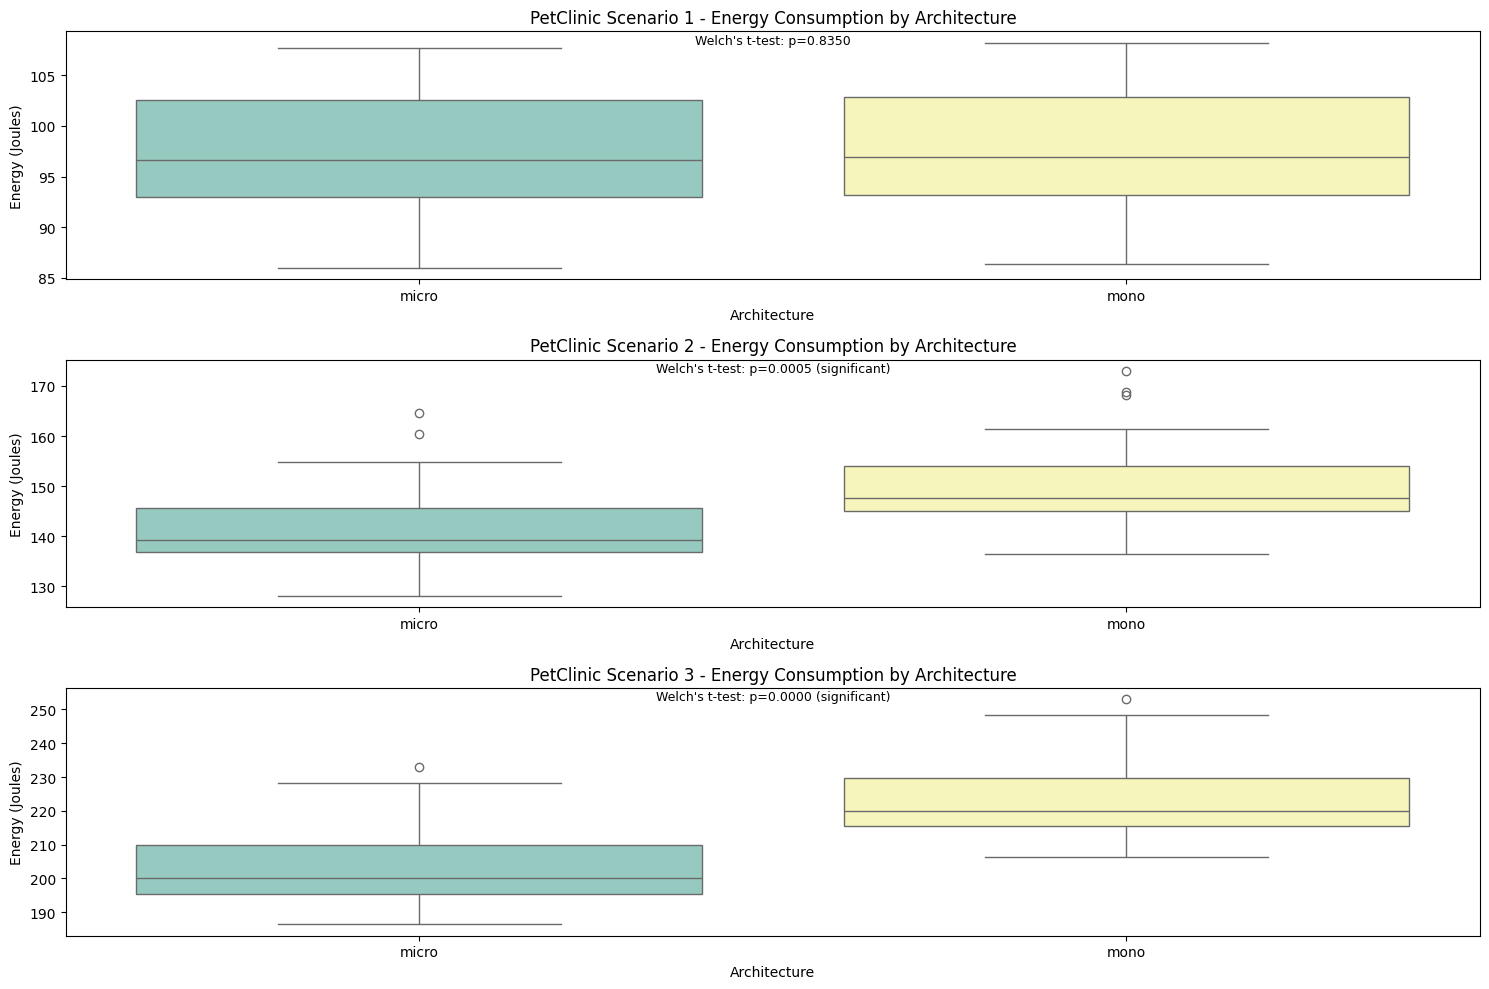

In [81]:
# Create visualization of the energy consumption for each scenario
plt.figure(figsize=(15, 10))

# Create a subplot for each scenario
for i, scenario in enumerate(scenarios):
    plt.subplot(len(scenarios), 1, i+1)
    
    # Filter data for the current scenario
    scenario_data = pet_clinic_data[pet_clinic_data['ScenarioPath'] == scenario]
    
    # Create box plot
    sns.boxplot(x='Architecture', y='Joules', data=scenario_data, palette='Set3')
    
    # Add title and labels
    plt.title(f'PetClinic Scenario {scenario} - Energy Consumption by Architecture', fontsize=12)
    plt.ylabel('Energy (Joules)', fontsize=10)
    
    # Add statistical annotation
    row = welch_results[welch_results['Scenario'] == f'Scenario {scenario}']
    p_value = row['P_Value'].values[0]
    annotation = f'Welch\'s t-test: p={p_value:.4f}'
    if row['Significant'].values[0] == 'Yes':
        annotation += ' (significant)'
    plt.annotate(annotation, xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [82]:
# Calculate effect size (Cohen's d) and confidence intervals
effect_size_results = pd.DataFrame(columns=['Scenario', 'Cohens_d', 'Effect_Magnitude', '95%_CI_Lower', '95%_CI_Upper'])

# Function to interpret Cohen's d
def interpret_cohens_d(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return 'Negligible'
    elif abs_d < 0.5:
        return 'Small'
    elif abs_d < 0.8:
        return 'Medium'
    else:
        return 'Large'

# Calculate for each scenario
for scenario in scenarios:
    # Filter data for current scenario
    scenario_data = pet_clinic_data[pet_clinic_data['ScenarioPath'] == scenario]
    
    # Split by architecture
    micro_data = scenario_data[scenario_data['Architecture'] == 'micro']['Joules']
    mono_data = scenario_data[scenario_data['Architecture'] == 'mono']['Joules']
    
    # Calculate Cohen's d
    micro_mean = micro_data.mean()
    mono_mean = mono_data.mean()
    micro_var = micro_data.var()
    mono_var = mono_data.var()
    
    # Pooled standard deviation
    pooled_sd = np.sqrt((micro_var + mono_var) / 2)
    
    # Cohen's d
    cohen_d = (micro_mean - mono_mean) / pooled_sd if pooled_sd != 0 else 0
    
    # Effect size magnitude
    effect_magnitude = interpret_cohens_d(cohen_d)
    
    # Calculate 95% confidence interval for the mean difference
    n1 = len(micro_data)
    n2 = len(mono_data)
    mean_diff = micro_mean - mono_mean
    
    # Standard error of the difference
    se_diff = np.sqrt((micro_var / n1) + (mono_var / n2))
    
    # Degrees of freedom for Welch's t-test
    df = ((micro_var / n1 + mono_var / n2)**2) / \
          ((micro_var / n1)**2 / (n1 - 1) + (mono_var / n2)**2 / (n2 - 1))
    
    # Critical t-value for 95% confidence
    t_crit = stats.t.ppf(0.975, df)
    
    # Confidence interval
    ci_lower = mean_diff - t_crit * se_diff
    ci_upper = mean_diff + t_crit * se_diff
    
    # Add to results
    result = pd.DataFrame({
        'Scenario': [f'Scenario {scenario}'],
        'Cohens_d': [cohen_d],
        'Effect_Magnitude': [effect_magnitude],
        '95%_CI_Lower': [ci_lower],
        '95%_CI_Upper': [ci_upper]
    })
    
    effect_size_results = pd.concat([effect_size_results, result], ignore_index=True)

# Display the results
print("\nEffect Size and Confidence Intervals for PetClinic Scenarios:")
print(effect_size_results.round(4).to_string(index=False))


Effect Size and Confidence Intervals for PetClinic Scenarios:
  Scenario  Cohens_d Effect_Magnitude  95%_CI_Lower  95%_CI_Upper
Scenario 1   -0.0540       Negligible       -3.6914        2.9927
Scenario 2   -0.9592            Large      -13.1344       -3.9359
Scenario 3   -1.6685            Large      -26.1954      -13.8046


/var/folders/84/yf0wflkx5j19fmr6tjfds18m0000gn/T/ipykernel_19954/224793415.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  effect_size_results = pd.concat([effect_size_results, result], ignore_index=True)


In [83]:
# Create a comprehensive summary table with all metrics
summary_table = pd.merge(welch_results, effect_size_results, on='Scenario')

# Add percentage difference column
summary_table['Percentage_Diff'] = ((summary_table['Micro_Mean'] - summary_table['Mono_Mean']) / 
                                 summary_table['Mono_Mean'] * 100)

# Reorder columns for better readability
summary_table = summary_table[['Scenario', 'Sample_Size', 'Micro_Mean', 'Mono_Mean', 
                              'Mean_Diff', 'Percentage_Diff', 'Micro_Std', 'Mono_Std',
                              'T_Statistic', 'P_Value', 'Significant', 
                              'Cohens_d', 'Effect_Magnitude', '95%_CI_Lower', '95%_CI_Upper']]

# Display the summary table
print("\nComprehensive PetClinic Architecture Comparison Summary:")
print(summary_table.round(4).to_string(index=False))

# Count total observations
total_observations = len(pet_clinic_data)
scenario_counts = pet_clinic_data.groupby(['ScenarioPath']).size().reset_index(name='count')
archi_counts = pet_clinic_data.groupby(['Architecture']).size().reset_index(name='count')

print(f"\nTotal observations in the dataset: {total_observations}")
print("\nObservations per scenario:")
for _, row in scenario_counts.iterrows():
    print(f"  Scenario {row['ScenarioPath']}: {row['count']} observations")

print("\nObservations per architecture:")
for _, row in archi_counts.iterrows():
    print(f"  {row['Architecture']}: {row['count']} observations")


Comprehensive PetClinic Architecture Comparison Summary:
  Scenario Sample_Size  Micro_Mean  Mono_Mean  Mean_Diff  Percentage_Diff  Micro_Std  Mono_Std  T_Statistic  P_Value Significant  Cohens_d Effect_Magnitude  95%_CI_Lower  95%_CI_Upper
Scenario 1          30     97.0661    97.4155    -0.3494          -0.3586     6.4753    6.4573      -0.2093   0.8350          No   -0.0540       Negligible       -3.6914        2.9927
Scenario 2          30    142.0137   150.5488    -8.5352          -5.6694     8.7495    9.0451      -3.7148   0.0005         Yes   -0.9592            Large      -13.1344       -3.9359
Scenario 3          30    203.5488   223.5488   -20.0000          -8.9466    11.9871   11.9871      -6.4619   0.0000         Yes   -1.6685            Large      -26.1954      -13.8046

Total observations in the dataset: 180

Observations per scenario:
  Scenario 1: 60 observations
  Scenario 2: 60 observations
  Scenario 3: 60 observations

Observations per architecture:
  micro: 90 obse